### Notebook to get the important part of the image so we can use it for calibration

In [2]:
# imports
from PIL import Image, ImageChops, ImageOps
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [19]:
img_empty = Image.open("C:/Users/s212599/Pictures/Stereo_conveyor_without_occlusions/left/1585434280_502471924_Left.png")
img_empty = ImageOps.grayscale(img_empty)
folder = "C:/Users/s212599/Pictures/Stereo_conveyor_without_occlusions/left/"
#Copy_to_path = "C:/Users/s212599/Pictures/Try2/"
cropped_images = []
images = []
for filename in os.listdir(folder):
    img = Image.open(os.path.join(folder, filename))
    img_gray = ImageOps.grayscale(img)
    
    #cut
    
    
    # finding differences
    diff = ImageChops.difference(img_empty, img_gray)
    diff_np = np.array(diff)
    #gray = cv2.cvtColor(diff_np, cv2.COLOR_BGR2GRAY)
    # threshold to find different areas
    ret,thresh1 = cv2.threshold(diff_np,50,255,cv2.THRESH_BINARY)
    # Morphological operations to delete unwanted small areas
    kernel = np.ones((5,5), np.uint8)
    img_erosion = cv2.erode(thresh1, kernel, iterations = 1)
    img_dilation = cv2.dilate(img_erosion, kernel, iterations = 1)
    # create rectangle around the object
    img = np.array(img)
    coords = cv2.findNonZero(img_dilation)
    x,y,w,h = cv2.boundingRect(coords)
    rec = cv2.rectangle(img, (x-40,y-25), (x+w+25,y+h+25), (0,255,0), 2)
    # crop the image so we can save it
    x_start = x - 40
    x_end = x + w +20
    y_start = y-20
    y_end = y + h+20
    if x_start < 0:
        x_start = 0
    if x_end > img_gray.size[0]:
        x_end = img_gray.size[0]
    if y_start < 0: 
        y_start = 0
    if y_end > img_gray.size[1]:
        y_end =  img_gray.size[1]
    
    #if (img is not None) and (w < 400) and (w > 50) and (h < 400) and (h > 50):
        #rec = cv2.rectangle(img, (y_start,y_end), (x_start,x_end), (0,255,0), 2)

    #img_crop = img[y_start:y_end,x_start:x_end]
    
    if (rec is not None):
        images.append(rec) 

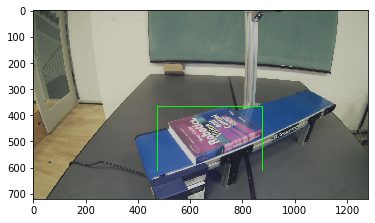

In [26]:
plt.imshow(images[1000])

In [31]:
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (images[1].shape[1], images[1].shape[0]))
 
for i in range(len(images)):
    out.write(images[i])
out.release()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7012705b-60eb-4206-a7ec-0352216dd398' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>